# 🏡 House Price Prediction

This project aims to predict house sale prices using machine learning techniques on the Ames Housing dataset. It demonstrates the end-to-end data science workflow including data exploration, preprocessing, feature engineering, model training, and evaluation.

---

## 📊 Project Workflow

1. Import libraries and load dataset
2. Exploratory Data Analysis (EDA)
3. Handle missing values
4. Feature engineering and preprocessing
5. Train/test split and scaling
6. Model training & evaluation
7. Conclusions and future improvements

---

In [137]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [112]:
# Load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 🔎 Exploratory Data Analysis (EDA)

Let's inspect the dataset to understand its structure and relationships between features and the target variable (`SalePrice`).

In [3]:
print(train.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
train["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

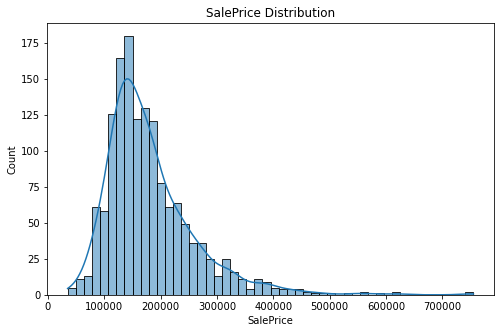

In [113]:
#target variable distribution
plt.figure(figsize=(8,5))
sns.histplot(train["SalePrice"], bins=50, kde=True)
plt.title("SalePrice Distribution")
plt.show()

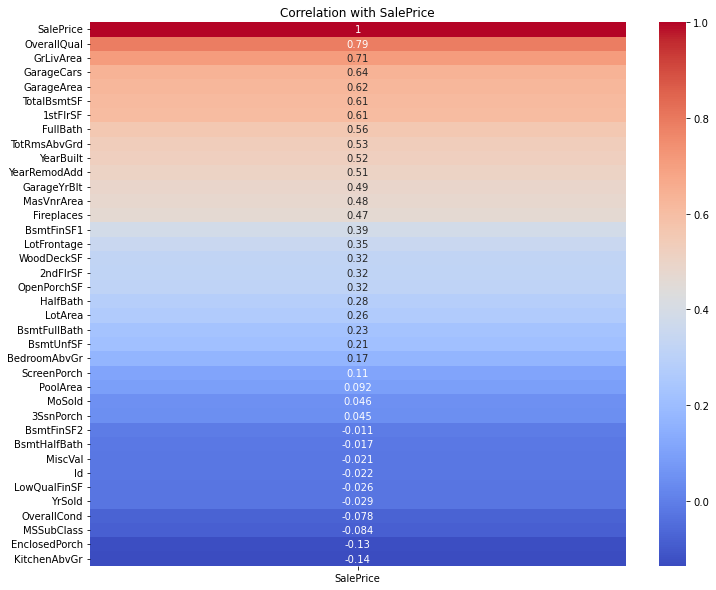

In [6]:
# correlation heatmap
corr= train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr["SalePrice"].sort_values(ascending=False).to_frame(),annot=True, cmap="coolwarm" )
plt.title("Correlation with SalePrice")
plt.show()


In [51]:
correlation= train.corr()["SalePrice"].sort_values(ascending=False).to_frame().head(15)
correlation.style.background_gradient(cmap=sns.light_palette("cyan", as_cmap=True))



,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


# handelingmissing values


<AxesSubplot:>

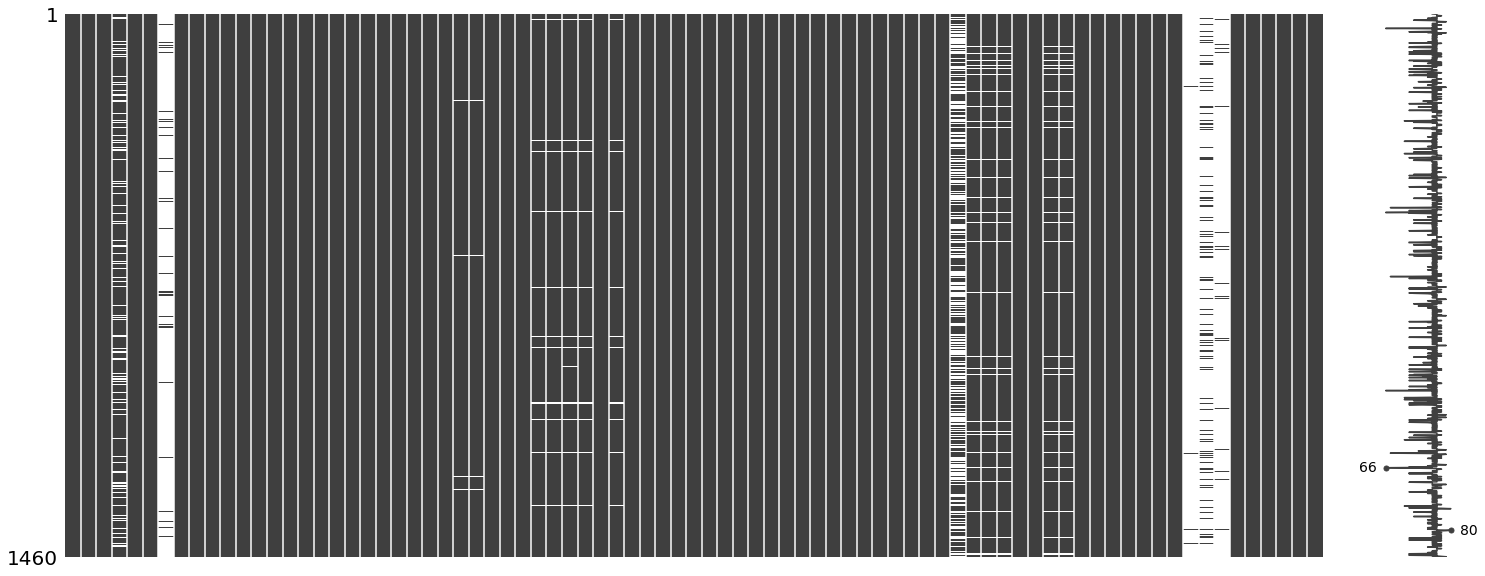

In [34]:
import missingno
%matplotlib inline

missingno.matrix(train)

In [41]:
def missing_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    missings_index= data.isnull().sum().index
    values= data.isnull().sum().values
    percentMissing=[]
    for i in missings_index:
        percentMissing.append((data[i].isnull().sum()/ data[i].shape[0] )*100)
    table= {"columns":missings_index, "count of null values": values, "percent of null values":percentMissing}
    null_frame = pd.DataFrame(table)
    return null_frame
null_frame_train = missing_table(train)
null_frame_train.sort_values(by = 'percent of null values').tail(10)   


,columns,count of null values,percent of null values
60,GarageFinish,81,5.547945
59,GarageYrBlt,81,5.547945
58,GarageType,81,5.547945
64,GarageCond,81,5.547945
3,LotFrontage,259,17.739726
57,FireplaceQu,690,47.260274
73,Fence,1179,80.753425
6,Alley,1369,93.767123
74,MiscFeature,1406,96.301370
72,PoolQC,1453,99.520548


In [42]:
null_test= missing_table(test)
null_test.sort_values(by="percent of null values").tail(10)

,columns,count of null values,percent of null values
60,GarageFinish,78,5.346127
59,GarageYrBlt,78,5.346127
63,GarageQual,78,5.346127
64,GarageCond,78,5.346127
3,LotFrontage,227,15.558602
57,FireplaceQu,730,50.034270
73,Fence,1169,80.123372
6,Alley,1352,92.666210
74,MiscFeature,1408,96.504455
72,PoolQC,1456,99.794380


In [8]:
missing = train.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing[missing>0].head(20))


Missing Values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


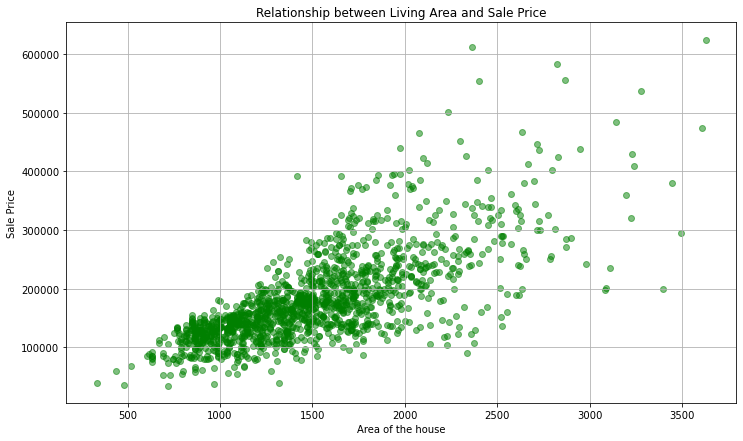

In [61]:
plt.figure(figsize = ((12, 7)))
plt.grid()
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = train, color='green',alpha = 0.5)
plt.title('Relationship between Living Area and Sale Price')
plt.xlabel('Area of the house')
plt.ylabel('Sale Price')
plt.show()

In [114]:
train= train[train['GrLivArea']<4000]


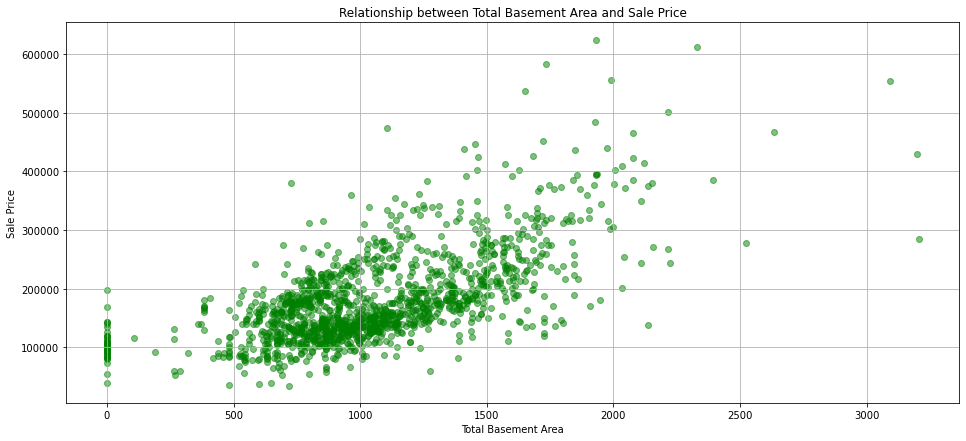

In [62]:
plt.figure(figsize = ((16, 7)))
plt.grid()
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'], color = 'green', alpha = 0.5)
plt.title('Relationship between Total Basement Area and Sale Price')
plt.xlabel('Total Basement Area')
plt.ylabel('Sale Price')
plt.show()


In [115]:
train= train[train['TotalBsmtSF']<3000]


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

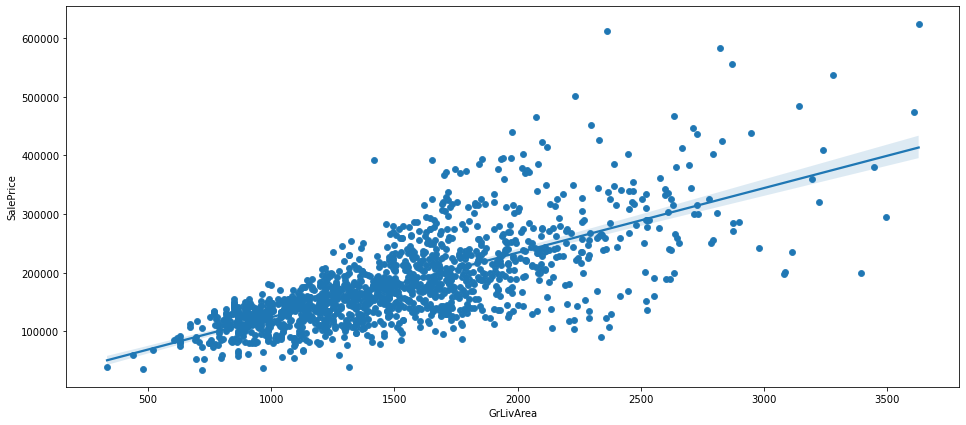

In [66]:
plt.figure(figsize = ((16, 7)))
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'])
## Putting a regression line. 
sns.regplot(x = train['GrLivArea'], y = train['SalePrice'])



In [67]:
#تبدیل لگاریتمی برای این که مطمئن شویم توزیع نرمال است

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

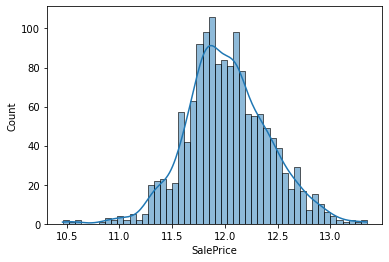

In [116]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.histplot(data=train["SalePrice"], bins=50 ,kde=True)

# handel missing value

In [117]:
missing_col=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
train= train.drop(missing_col, axis=1)

In [118]:
missing_col=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
test= test.drop(missing_col, axis=1)


In [97]:
category_var = train.select_dtypes(include = 'object')
num_var = train.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  38
Number of numerical features are:  38


In [119]:
# Fill numeric with median, categorical with mode
for col in train.columns:
    if train[col].dtype == "object":
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

for col in test.columns:
    if test[col].dtype == "object":
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test[col] = test[col].fillna(test[col].median())



In [120]:
missing = train.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing[missing>0].head(20))

Missing Values:
 Series([], dtype: int64)


# Feature Engineering


In [121]:
# Encode categorical variables
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Align columns in train and test
train, test = train.align(test, join="left", axis=1, fill_value=0)

X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]



In [122]:
#Split & Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [103]:
import warnings
warnings.simplefilter(action="ignore")

#Models Training and Evaluation


In [144]:
models={
    "linear regression": LinearRegression(),
    "ridge":Ridge(alpha=1),
    "lasso":Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42)
}

results={}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred= model.predict(X_test_scaled)
    rmse= np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    results[name] = (rmse, r2)

In [145]:
print(results)

{'linear regression': (0.13249718043089118, 0.8962112232431165), 'ridge': (0.13330151318045605, 0.8949472854075129), 'lasso': (0.22589714109023432, 0.698311615338882), 'Random Forest': (0.1507105760222675, 0.8657159039756172), 'XGBoost': (0.13791591723122437, 0.887548331234562)}


In [130]:
#Show Results
print("Model Performance (Validation Set):")
for name, (rmse, r2) in results.items():
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.3f}")


Model Performance (Validation Set):
linear regression: RMSE=0.13, R2=0.896
ridge: RMSE=0.13, R2=0.895
lasso: RMSE=0.23, R2=0.698
Random Forest: RMSE=0.15, R2=0.866
XGBoost: RMSE=0.14, R2=0.889


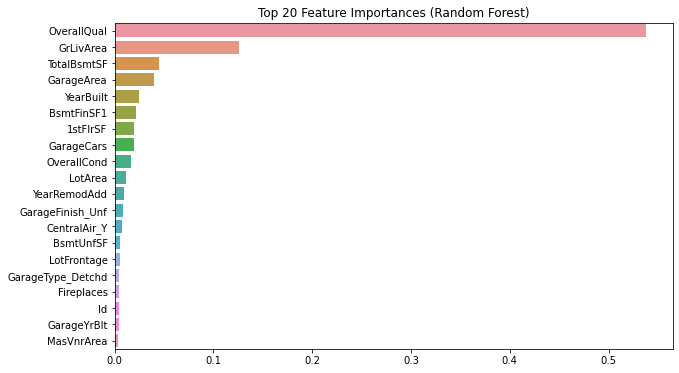

In [146]:
#Feature Importance (Random Forest)
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

In [147]:
#Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, objective="reg:squarederror")
}

#Hyperparameter Tuning
param_grids = {
    "Ridge": {"alpha": [0.1, 1, 10, 50, 100]},
    "Lasso": {"alpha": [0.0001, 0.001, 0.01, 0.1, 1]},
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
    },
    "XGBoost": {
        "n_estimators": [200, 500],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
    }
}



In [149]:
results = {}

for name, model in models.items():
    if name in param_grids:
        print(f"🔍 Hyperparameter tuning for {name}...")
        grid = GridSearchCV(model, param_grids[name], cv=5,
                            scoring="neg_root_mean_squared_error", n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
        print(f"Best Params for {name}: {grid.best_params_}")
    else:
        best_model = model.fit(X_train_scaled, y_train)

    pred = best_model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    results[name] = {"RMSE": rmse, "R2": r2, "Best Model": best_model}



🔍 Hyperparameter tuning for Ridge...
Best Params for Ridge: {'alpha': 100}
🔍 Hyperparameter tuning for Lasso...
Best Params for Lasso: {'alpha': 0.001}
🔍 Hyperparameter tuning for Random Forest...
Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
🔍 Hyperparameter tuning for XGBoost...
Best Params for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}


In [153]:
#Compare Results
df_results = pd.DataFrame(results).T[["RMSE", "R2"]].sort_values(by="RMSE")
df_results


,RMSE,R2
Linear Regression,0.132497,0.896211
Lasso,0.136708,0.889509
Ridge,0.137711,0.887883
XGBoost,0.137916,0.887548
Random Forest,0.150751,0.865644


In [156]:
#Save Best Model
import joblib
best_model_name = df_results.index[0]
print(f" Best Model: {best_model_name}")
joblib.dump(results[best_model_name]["Best Model"], "best_house_price_model.pkl")


 Best Model: Linear Regression


['best_house_price_model.pkl']